In [2]:
import pandas as pd


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# ML

In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df_final_clean = pd.read_excel("df_final_clean.xlsx")
df_final_clean_encoded = df_final_clean.copy()

# ✅ 3. แปลง categorical เป็นตัวเลข (ถ้ามี)
for col in df_final_clean_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_final_clean_encoded[col] = le.fit_transform(df_final_clean_encoded[col]).astype(int)

df_final_clean_encoded = df_final_clean_encoded.drop(columns=['date'])
df_final_clean_encoded

,cases,temp_15d_avg,rain_15d_avg,humid_15d_avg,อายุ(ปี),เพศ,อาชีพ,ตำบล,อำเภอ,เดือน,ปี,ไตรมาส,ฤดูกาล
0,1,22.745000,0.000000,74.794444,34.0,0,0,8,1,2,2017,1,2
1,1,27.170000,2.386667,74.827333,13.0,0,10,60,8,4,2017,2,1
2,1,27.786667,2.520000,73.410667,51.0,1,0,60,8,5,2017,2,1
3,1,27.970000,4.253333,73.302667,14.0,1,10,60,8,5,2017,2,1
4,2,28.501333,4.233333,73.984667,58.0,0,9,60,8,5,2017,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2,22.858571,2.071429,82.036429,20.5,1,6,3,2,12,2024,4,2
1046,2,22.716667,1.933333,81.784000,56.0,0,7,31,2,12,2024,4,2
1047,1,21.687333,1.933333,82.676000,11.0,1,10,15,2,12,2024,4,2
1048,1,21.304667,1.933333,82.992667,41.0,1,7,35,6,12,2024,4,2


In [6]:
df_final_clean_encoded.corr()['cases']

cases            1.000000
temp_15d_avg     0.100030
rain_15d_avg     0.094145
humid_15d_avg    0.018460
อายุ(ปี)        -0.034136
เพศ              0.007874
อาชีพ            0.088724
ตำบล             0.051749
อำเภอ            0.042857
เดือน           -0.005328
ปี               0.229528
ไตรมาส           0.013666
ฤดูกาล          -0.147233
Name: cases, dtype: float64

อันเก่า

✅ RMSE: 0.39
✅ R²: 0.986


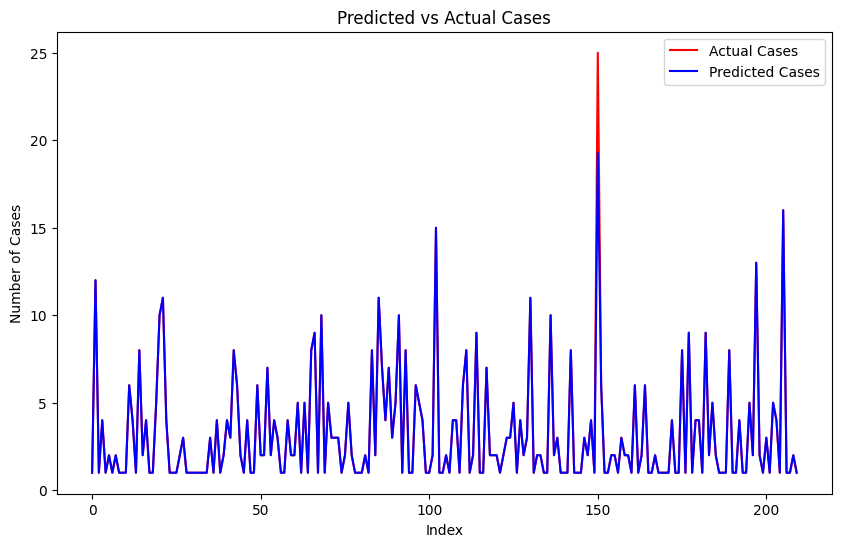

In [88]:

# ✅ 4. กำหนด X และ y
X = df_final_clean_encoded.drop(columns=['เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 5. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. สร้างโมเดล Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ✅ 7. ฝึกโมเดล
gb_model.fit(X_train, y_train)

# ✅ 8. ทำนายผล
y_pred = gb_model.predict(X_test)

# ✅ 9. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.3f}")

# ✅ 10. วาดกราฟเปรียบเทียบค่าทำนาย vs ค่าจริง
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases', color='blue')
plt.title('Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [7]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


✅ XGBoost RMSE: 0.08
✅ XGBoost R²: 0.999
✅ XGBoost MAE: 0.01


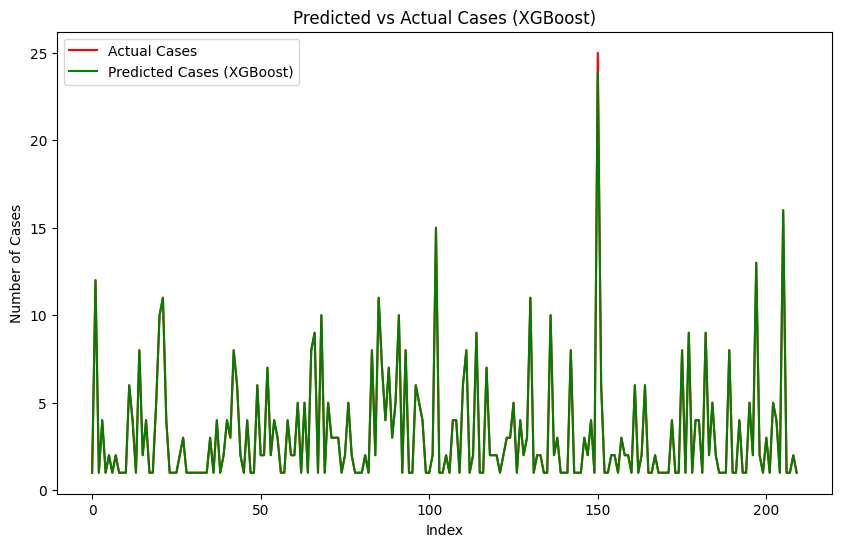

In [90]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ✅ 4. กำหนด X และ y
X = df_final_clean_encoded.drop(columns=['เพศ','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ✅ 5. แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 6. สร้างโมเดล XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ✅ 7. ฝึกโมเดล
xgb_model.fit(X_train, y_train)

# ✅ 8. ทำนายผล
y_pred = xgb_model.predict(X_test)

# ✅ 9. ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # คำนวณ MAE

print(f"✅ XGBoost RMSE: {rmse:.2f}")
print(f"✅ XGBoost R²: {r2:.3f}")
print(f"✅ XGBoost MAE: {mae:.2f}")  # แสดงผล MAE

# ✅ 10. วาดกราฟเปรียบเทียบค่าทำนาย vs ค่าจริง
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, "xgb_regressor.pkl")
print("✅ Saved new model: xgb_regressor.pkl")


✅ Saved new model: xgb_regressor.pkl


ทำใหม่เทรน


🔹 XGBoost RMSE: 3.12, R²: 0.167, MAE: 2.33
📊 XGBoost CV R² mean: -0.097, std: 0.211
💾 Saved: xgb_regressor.pkl + xgb_features.pkl


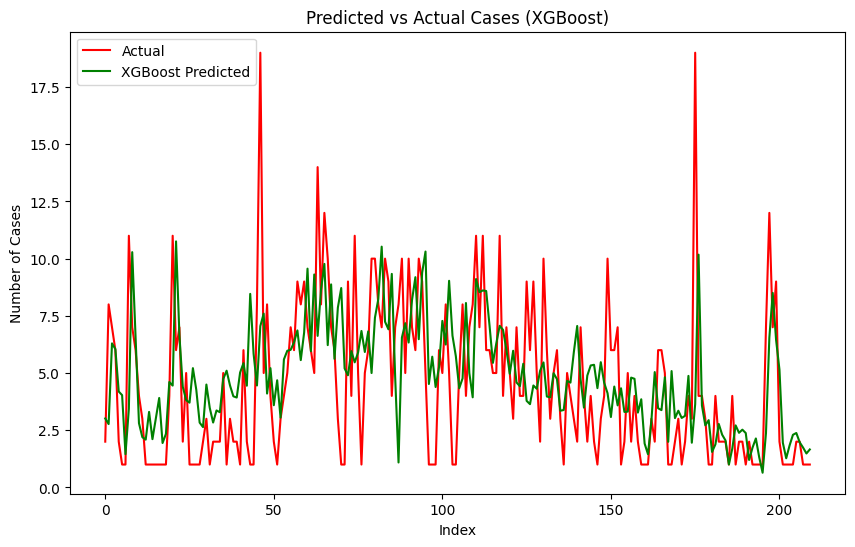

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# -------------------------------
# 1) เตรียมข้อมูล + lag features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X = df_with_lag.drop(columns=["cases", "เพศ", "อายุ(ปี)", "ไตรมาส", "humid_15d_avg"])
y = df_with_lag["cases"]

# -------------------------------
# 2) Train/Test Split (Time Series)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------------
# ฟังก์ชันประเมินผล
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"🔹 {name} RMSE: {rmse:.2f}, R²: {r2:.3f}, MAE: {mae:.2f}")
    return {"Model": name, "RMSE": rmse, "R2": r2, "MAE": mae}, y_pred

# -------------------------------
# 3) Train + Evaluate XGBoost
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

xgb_result, xgb_pred = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# Cross-validation (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb_model, X, y, cv=tscv, scoring="r2")
print(f"📊 XGBoost CV R² mean: {cv_scores.mean():.3f}, std: {cv_scores.std():.3f}")

# -------------------------------
# 4) Save XGBoost Model + Features
# -------------------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("💾 Saved: xgb_regressor.pkl + xgb_features.pkl")

# -------------------------------
# 5) Visualization
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(xgb_pred, label="XGBoost Predicted", color="green")
plt.title("Predicted vs Actual Cases (XGBoost)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


🔹 XGBoost RMSE: 3.12, R²: 0.167, MAE: 2.33
🔹 RandomForest RMSE: 2.97, R²: 0.245, MAE: 2.24
🔹 Deep Learning RMSE: 3.06, R²: 0.198, MAE: 2.32

📊 Performance Comparison:
           Model      RMSE        R2       MAE
0        XGBoost  3.116279  0.167044  2.330670
1   RandomForest  2.966994  0.244937  2.243819
2  Deep Learning  3.057424  0.198209  2.320110


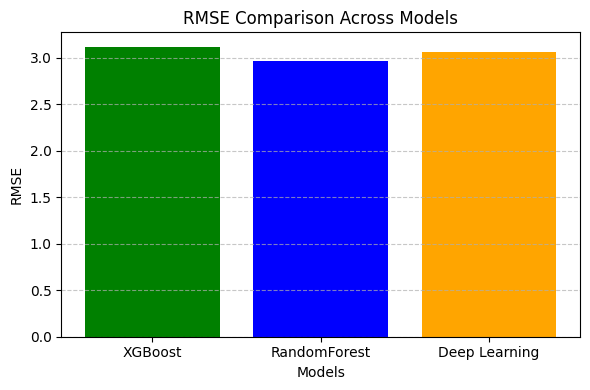

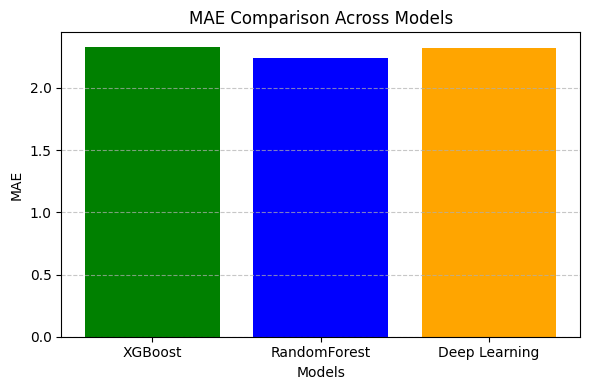

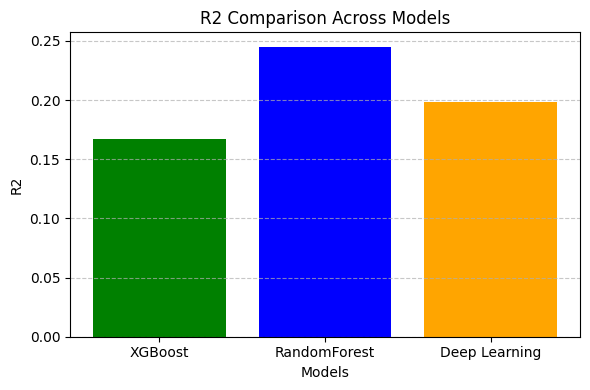

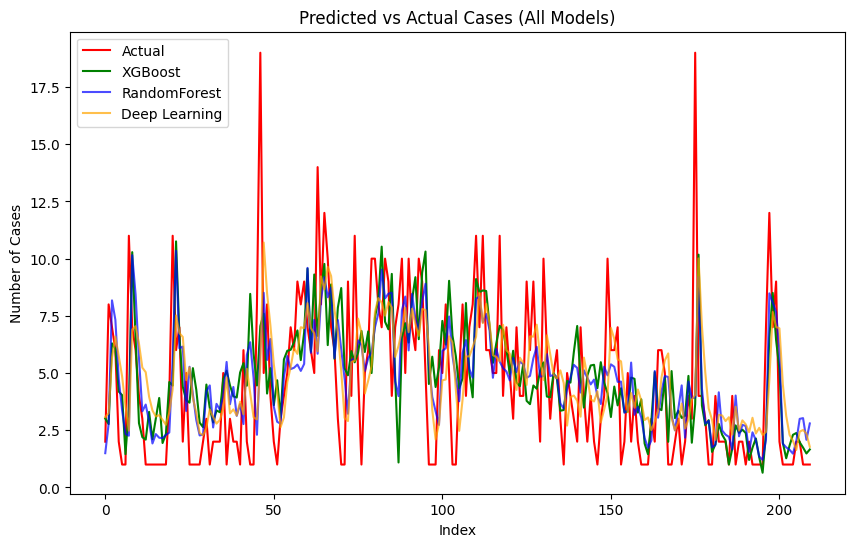

In [50]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1) เตรียมข้อมูล + lag features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X = df_with_lag.drop(columns=["cases","เพศ","อายุ(ปี)","ไตรมาส","humid_15d_avg"])
y = df_with_lag["cases"]

# -------------------------------
# 2) Train/Test Split (time series)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# ฟังก์ชันประเมินผล
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"🔹 {name} RMSE: {rmse:.2f}, R²: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }, y_pred

# -------------------------------
# 3) Train + Evaluate Models
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)
xgb_result, xgb_pred = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf_result, rf_pred = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)
mlp_result, mlp_pred = evaluate_model("Deep Learning", mlp_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 4) รวมผลลัพธ์เป็นตาราง
# -------------------------------
results_df = pd.DataFrame([xgb_result, rf_result, mlp_result])
print("\n📊 Performance Comparison:")
print(results_df)

# -------------------------------
# 5) วาดกราฟเปรียบเทียบ (Metric)
# -------------------------------
metrics = ["RMSE", "MAE", "R2"]
for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df["Model"], results_df[metric], color=["green","blue","orange"])
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6) วาดกราฟ Predicted vs Actual
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(xgb_pred, label="XGBoost", color="green")
plt.plot(rf_pred, label="RandomForest", color="blue", alpha=0.7)
plt.plot(mlp_pred, label="Deep Learning", color="orange", alpha=0.7)
plt.title("Predicted vs Actual Cases (All Models)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


เทียบว่าถ้ามีเลกเเละไม่มี

🔹 XGBoost (No Lag) RMSE: 3.31, R²: 0.060, MAE: 2.40
🔹 XGBoost (Lag Features) RMSE: 3.12, R²: 0.167, MAE: 2.33

📊 Performance Comparison:
                    Model      RMSE        R2       MAE
0        XGBoost (No Lag)  3.311099  0.059641  2.395751
1  XGBoost (Lag Features)  3.116279  0.167044  2.330670


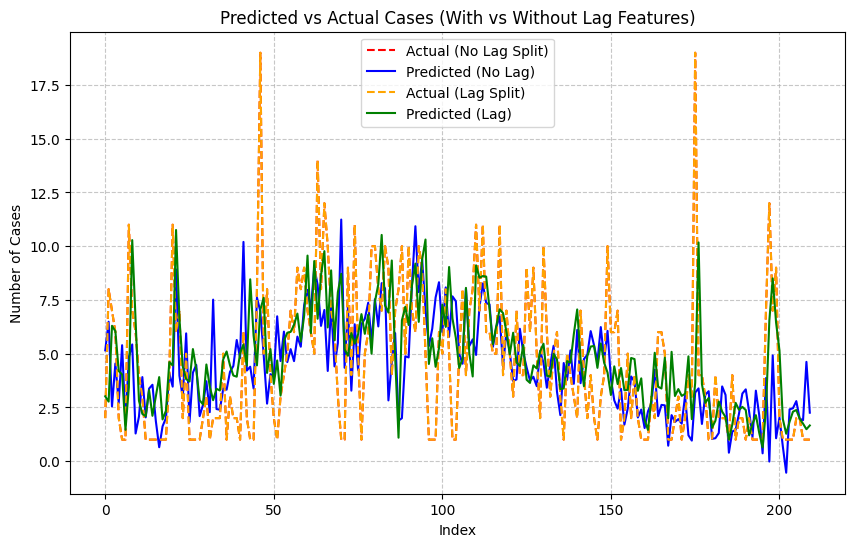

💾 Saved: xgb_regressor.pkl + xgb_features.pkl (Lag Version)


In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# -------------------------------
# ฟังก์ชันประเมินผล
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"🔹 {name} RMSE: {rmse:.2f}, R²: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }, y_pred

# -------------------------------
# 1) Dataset แบบไม่มี Lag Features
# -------------------------------
X_no_lag = df_final_clean_encoded.drop(columns=["cases","เพศ","อายุ(ปี)","ไตรมาส","humid_15d_avg"])
y_no_lag = df_final_clean["cases"]

X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_no_lag, y_no_lag, test_size=0.2, shuffle=False, random_state=42
)

xgb_no_lag = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)

res_no_lag, y_pred_nl = evaluate_model("XGBoost (No Lag)", xgb_no_lag,
                                       X_train_nl, X_test_nl, y_train_nl, y_test_nl)

# -------------------------------
# 2) Dataset แบบมี Lag Features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X_lag = df_with_lag.drop(columns=["cases","เพศ","อายุ(ปี)","ไตรมาส","humid_15d_avg"])
y_lag = df_with_lag["cases"]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lag, y_lag, test_size=0.2, shuffle=False, random_state=42
)

xgb_lag = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)

res_lag, y_pred_l = evaluate_model("XGBoost (Lag Features)", xgb_lag,
                                   X_train_l, X_test_l, y_train_l, y_test_l)

# -------------------------------
# 3) รวมผลลัพธ์เปรียบเทียบ
# -------------------------------
results_df = pd.DataFrame([res_no_lag, res_lag])
print("\n📊 Performance Comparison:")
print(results_df)

# -------------------------------
# 4) วาดกราฟเปรียบเทียบ
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test_nl.values, label="Actual (No Lag Split)", color="red", linestyle="--")
plt.plot(y_pred_nl, label="Predicted (No Lag)", color="blue")
plt.plot(y_test_l.values, label="Actual (Lag Split)", color="orange", linestyle="--")
plt.plot(y_pred_l, label="Predicted (Lag)", color="green")
plt.title("Predicted vs Actual Cases (With vs Without Lag Features)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------------------
# 5) บันทึกโมเดล Lag (เลือกไว้ใช้จริง)
# -------------------------------
joblib.dump(xgb_lag, "xgb_regressor.pkl")
joblib.dump(X_lag.columns.tolist(), "xgb_features.pkl")
print("💾 Saved: xgb_regressor.pkl + xgb_features.pkl (Lag Version)")


In [18]:
X

,temp_15d_avg,rain_15d_avg,อาชีพ,ตำบล,อำเภอ,เดือน,ปี,ฤดูกาล,cases_lag1,cases_lag2,cases_lag3
0,27.970000,4.253333,10,60,8,5,2017,1,1.0,1.0,1.0
1,28.501333,4.233333,9,60,8,5,2017,1,1.0,1.0,1.0
2,28.355333,4.253333,9,60,8,5,2017,1,2.0,1.0,1.0
3,28.310000,2.100000,6,60,8,5,2017,1,1.0,2.0,1.0
4,27.778000,15.313333,10,29,5,5,2017,0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1042,22.858571,2.071429,6,3,2,12,2024,2,1.0,1.0,1.0
1043,22.716667,1.933333,7,31,2,12,2024,2,2.0,1.0,1.0
1044,21.687333,1.933333,10,15,2,12,2024,2,2.0,2.0,1.0
1045,21.304667,1.933333,7,35,6,12,2024,2,1.0,2.0,2.0


อันเก่า

📊 Comparison of Models (RMSE & MAE):
               Model  RMSE   MAE
0  Gradient Boosting  0.39  0.03
1            XGBoost  0.08  0.01
2      Random Forest  0.39  0.03
3      Deep Learning  0.13  0.10


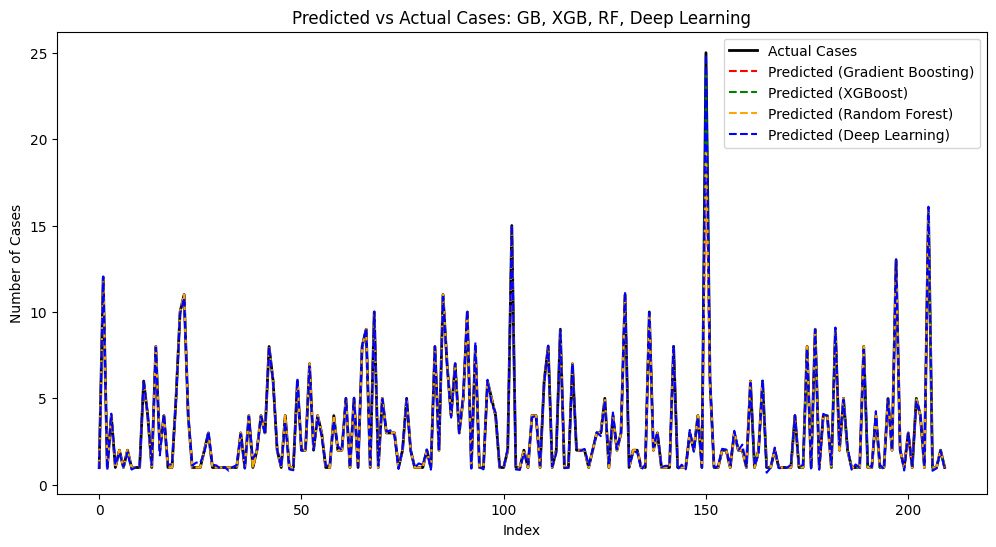

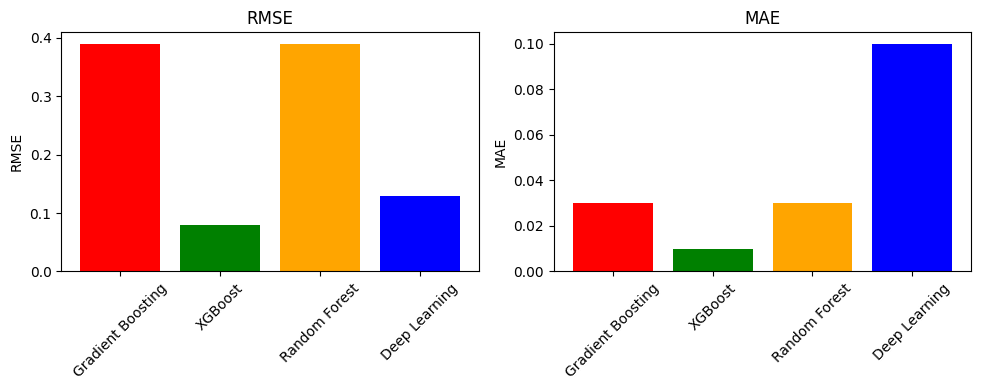

In [ ]:
# ==========================
# 0. Import Libraries
# ==========================
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================
# 1. กำหนด X และ y
# ==========================
X = df_final_clean_encoded.drop(columns=['เพศ','เดือน','อายุ(ปี)','ไตรมาส','humid_15d_avg'])
y = df_final_clean['cases']

# ==========================
# 2. แบ่งชุด train/test
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 3. Standardize สำหรับ Deep Learning
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. โมเดล Gradient Boosting
# ==========================
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ==========================
# 5. โมเดล XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ==========================
# 6. โมเดล Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 7. โมเดล Deep Learning (MLP)
# ==========================
dl_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                        max_iter=500, random_state=42)
dl_model.fit(X_train_scaled, y_train)
y_pred_dl = dl_model.predict(X_test_scaled)

# ==========================
# 8. ประเมินผล RMSE & MAE
# ==========================
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Deep Learning']
preds = [y_pred_gb, y_pred_xgb, y_pred_rf, y_pred_dl]

metrics = []
for name, y_pred in zip(models, preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append({'Model': name, 'RMSE': round(rmse,2), 'MAE': round(mae,2)})

metrics_df = pd.DataFrame(metrics)
print("📊 Comparison of Models (RMSE & MAE):")
print(metrics_df)

# ==========================
# 9. กราฟ Actual vs Predicted
# ==========================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Cases', color='black', linewidth=2)
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red', linestyle='--')
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='orange', linestyle='--')
plt.plot(y_pred_dl, label='Predicted (Deep Learning)', color='blue', linestyle='--')
plt.title('Predicted vs Actual Cases: GB, XGB, RF, Deep Learning')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ==========================
# 10. Bar chart RMSE & MAE
# ==========================
plt.figure(figsize=(10,4))
metrics_list = ['RMSE','MAE']
colors = ['red','green','orange','blue']

for i, metric in enumerate(metrics_list):
    plt.subplot(1,2,i+1)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
